# Image Classification: Binary Class

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras import models
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import pickle

In [65]:
tf.config.run_functions_eagerly(True)

In [24]:
dir_image = ('C:/Users/shubh/PYthon/Assignment/Images/datasets')

##### Data Argumants

In [32]:
args_data = dict(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True, validation_split=.20)

#### Splitting Training and Validation

In [61]:
veh_train = tf.keras.preprocessing.image.ImageDataGenerator(**args_data)

generator_train = veh_train.flow_from_directory(
dir_image,
subset="training",
shuffle=True,
target_size=(224, 224),class_mode='binary')


veh_val = tf.keras.preprocessing.image.ImageDataGenerator(**args_data)

generator_val = veh_val.flow_from_directory(
dir_image,
subset="validation",
shuffle=True,
target_size=(224, 224),class_mode='binary')

Found 473 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [62]:
for image_batch, label_batch in generator_train:
    break
    image_batch.shape, label_batch.shape

In [63]:
print (generator_train.class_indices)

{'MC': 0, 'Scooter': 1}


### Fitting Model

In [81]:
base_model = tf.keras.Sequential([
 hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
 output_shape=[1280],
 trainable=False),
 tf.keras.layers.Dropout(0.4),
 tf.keras.layers.Dense(generator_train.num_classes, activation='sigmoid')
])

base_model.build([None, 224, 224, 3])
base_model.summary()



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_7 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_16 (Dropout)        (None, 1280)              0         
                                                                 
 dense_26 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [82]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)

base_model.compile(
 optimizer=optimizer,
 loss= 'binary_crossentropy',
 metrics=['accuracy'])


In [83]:
epochs=10
history = base_model.fit(
  generator_train,
  validation_data = generator_val,
  epochs = epochs
)

Epoch 1/10
15/15 [==============================] - 26s 2s/step - loss: 0.5272 - accuracy: 0.7738 - val_loss: 0.4673 - val_accuracy: 0.8136
Epoch 2/10
15/15 [==============================] - 23s 2s/step - loss: 0.3120 - accuracy: 0.8732 - val_loss: 0.3190 - val_accuracy: 0.8644
Epoch 3/10
15/15 [==============================] - 24s 2s/step - loss: 0.2472 - accuracy: 0.9239 - val_loss: 0.2633 - val_accuracy: 0.8814
Epoch 4/10
15/15 [==============================] - 23s 2s/step - loss: 0.1640 - accuracy: 0.9556 - val_loss: 0.2371 - val_accuracy: 0.9153
Epoch 5/10
15/15 [==============================] - 23s 2s/step - loss: 0.1331 - accuracy: 0.9725 - val_loss: 0.2023 - val_accuracy: 0.9237
Epoch 6/10
15/15 [==============================] - 24s 2s/step - loss: 0.1249 - accuracy: 0.9767 - val_loss: 0.1662 - val_accuracy: 0.9322
Epoch 7/10
15/15 [==============================] - 24s 2s/step - loss: 0.0975 - accuracy: 0.9873 - val_loss: 0.1862 - val_accuracy: 0.9237
Epoch 8/10
15/15 [==

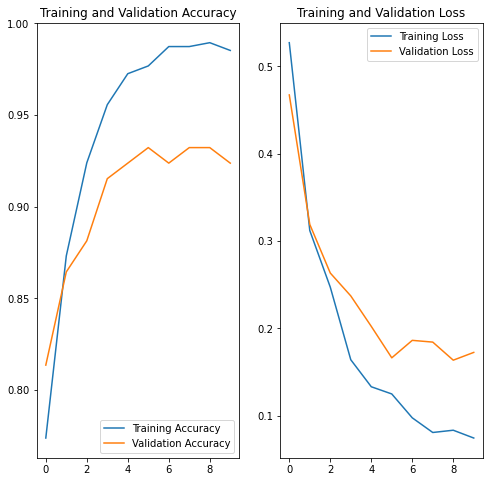

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [86]:
file_dir = 'C:/Users/shubh/PYthon/Assignment/Images/model_image.h5'
base_model.save(file_dir)